# Importando Bibliotecas

In [ ]:
import pickle
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Árvore de Decisão

## Base Risco de Crédito

In [ ]:
with open ('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)
    

In [ ]:
x_risco_credito

In [ ]:
y_risco_credito

from sklearn.tree import DecisionTreeClassifier

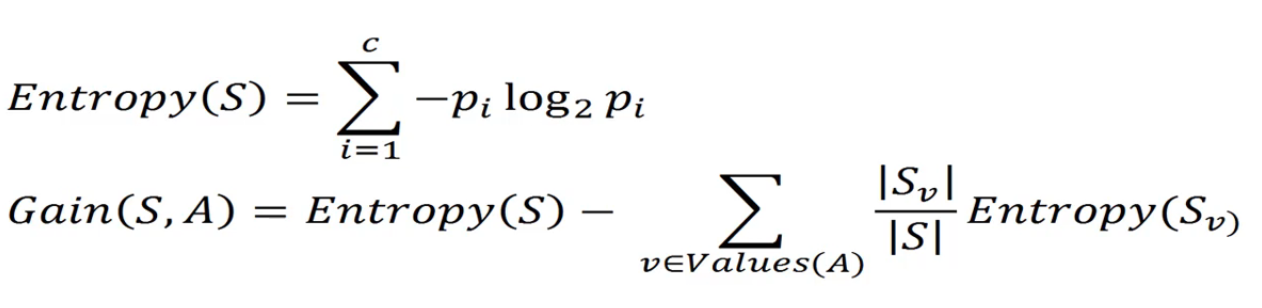

In [ ]:
arvore_risco_credito = DecisionTreeClassifier(criterion= 'entropy')    
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

In [ ]:
arvore_risco_credito.feature_importances_
# historico_credito,  divida, garantia, renda

from sklearn import tree

In [ ]:
arvore_risco_credito.classes_

In [ ]:
previsores = ['história', 'dívida', 'garantia', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True)

história boa, dívida alta, garantia nenhuma, renda > 35

história ruim, dívida alta, garantia adequada, renda < 35

In [ ]:
previsoes = arvore_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes

## Base Credit Data

In [ ]:
with open('credit.pkl', 'rb') as f:
    x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [ ]:
x_credit_training.shape, y_credit_training.shape

In [ ]:
x_credit_test.shape, y_credit_test.shape

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_credit.fit(x_credit_training, y_credit_training)

In [ ]:
previsoes = arvore_credit.predict(x_credit_test)
previsoes

In [ ]:
y_credit_test


from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(y_credit_test,previsoes)

from yellowbrick.classifier import ConfusionMatrix

In [ ]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_training, y_credit_training)
cm.score(x_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, previsoes))

In [ ]:
arvore_credit.classes_

In [ ]:
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names=previsoes, class_names=['0', '1'], filled=True);
fig.savefig('arvore_credit.png')

## Base Census

In [ ]:
with open('census.pkl', 'rb') as f:
    x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [ ]:
x_census_training.shape, y_census_training.shape

In [ ]:
x_census_test.shape, y_census_test.shape

In [ ]:
arvore_census = DecisionTreeClassifier(criterion='entropy' , random_state=0)
arvore_census.fit(x_census_training, y_census_training)

In [ ]:
previsoes = arvore_census.predict(x_census_test)
previsoes

In [ ]:
y_census_test

In [ ]:
accuracy_score(y_census_test, previsoes)

In [ ]:
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_training, y_census_training)
cm.score(x_census_test, y_census_test)

In [ ]:
#print(classification_report(y_census_test, previsoes))

# Random Forest

## Base Credit Data

from sklearn.ensemble import RandomForestClassifier

In [ ]:
with open('credit.pkl', 'rb') as f:
    x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [ ]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state= 0)
random_forest_credit.fit(x_credit_training, y_credit_training)

In [ ]:
previsoes = random_forest_credit.predict(x_credit_test)
previsoes == y_credit_test

In [ ]:
accuracy_score(y_credit_test, previsoes)

In [ ]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_training, y_credit_training)
cm.score(x_credit_test, y_credit_test)

In [ ]:
print(classification_report(y_credit_test, previsoes))

## Base Census

In [ ]:
with open('census.pkl', 'rb') as f:
    x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)
    

In [ ]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_training, y_census_training)

In [ ]:
previsoes = random_forest_census.predict(x_census_test)
previsoes == y_census_test

In [ ]:
accuracy_score(y_census_test, previsoes)

In [ ]:
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_training, y_census_training)
cm.score(x_census_test, y_census_test)

In [ ]:
print(classification_report(y_census_test, previsoes))